In [4]:
import pandas as pd
import matplotlib.pyplot as plt
# Importando dataframe
df = pd.read_excel('AdventureWorks.xlsx')

In [5]:
# Observandos os dados
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [6]:
# Tamanho do DF
df.shape

(904, 16)

In [7]:
# Informações estatísticas do DF
df.describe()

,ID Loja,ID Produto,ID Cliente,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda
count,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000
mean,270.015487,1225.238938,19029.092920,272.006150,742.527965,62.950221,689.123294,6620.139538
std,50.955280,706.698742,96.427655,129.765051,368.589889,148.945964,822.363117,4319.407257
min,199.000000,366.000000,18815.000000,5.090000,9.990000,2.000000,0.000000,159.840000
25%,199.000000,384.000000,18964.750000,324.690000,758.000000,6.000000,0.000000,3920.000000
50%,306.000000,1202.000000,19060.000000,330.660000,980.000000,9.000000,461.166000,5798.700000
75%,307.000000,1226.000000,19107.000000,348.580000,998.000000,17.000000,1005.075000,7986.000000
max,307.000000,2497.000000,19145.000000,348.580000,999.000000,1560.000000,6272.000000,29400.000000


In [8]:
# Verificando tipos das colunas
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [9]:
# Modificando tipos dos ID
df['ID Loja'] = df['ID Loja'].astype(object)
df['ID Cliente'] = df['ID Cliente'].astype(object)
df['ID Produto'] = df['ID Produto'].astype(object)

In [10]:
# Verificando se o valor do tipo foi alterado
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                   object
ID Produto                object
ID Cliente                object
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [11]:
# Calculando o valor de receita total
venda_total = df['Valor Venda'].sum()

In [12]:
# Qual foi o custo total de todas as vendas?
df['Custo'] = df['Custo Unitário'].mul(df['Quantidade'])
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [13]:
# Custo total de todas as vendas
custo_total = df['Custo'].sum()
custo_total

2486783.05

In [14]:
# Criei a coluna de margem de lucro em valor e em %
df['lucro (%)'] = (df['Custo'] * 100) / df['Valor Venda']
df['lucro_venda'] = df['Valor Venda'] - df['Custo']
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,lucro (%),lucro_venda
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,45.986807,2456.52


In [15]:
# A margem de lucro total
margem_lucro_total=(custo_total*100)/venda_total
round(margem_lucro_total,2)

41.55

In [16]:
# O lucro total
lucro_total = venda_total - custo_total
round(lucro_total,2)

3497823.09

In [17]:
# Qual o tempo de envio do produto?
df['Tempo de envio'] = (df['Data Envio'] - df['Data Venda']).dt.days
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,lucro (%),lucro_venda,Tempo de envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,45.986807,2456.52,20
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,45.986807,2456.52,5
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,45.986807,2456.52,6
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,45.986807,2456.52,6
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,45.986807,2456.52,7


In [18]:
# Média de tempo de envio de todas as marcas
tempo_medio = df['Tempo de envio'].mean()
round(tempo_medio,2)

8.54

In [19]:
#  Média de tempo de envio por marca
df.groupby('Marca')['Tempo de envio'].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo de envio, dtype: float64

In [20]:
# Verificando valores ausentes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
lucro (%)         0
lucro_venda       0
Tempo de envio    0
dtype: int64

In [21]:
# Agrupamento de lucro por ano e marca
df.groupby([df['Data Venda'].dt.year, "Marca"])['lucro_venda'].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: lucro_venda, dtype: float64

In [22]:
# Conversão do formato Float
pd.options.display.float_format = '{:20,.2f}'.format

In [23]:
# Resetando index
lucro_ano = df.groupby([df['Data Venda'].dt.year, 'Marca'])['lucro_venda'].sum().reset_index()
lucro_ano

,Data Venda,Marca,lucro_venda
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [24]:
# Qual o total de produtos vendidos?
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

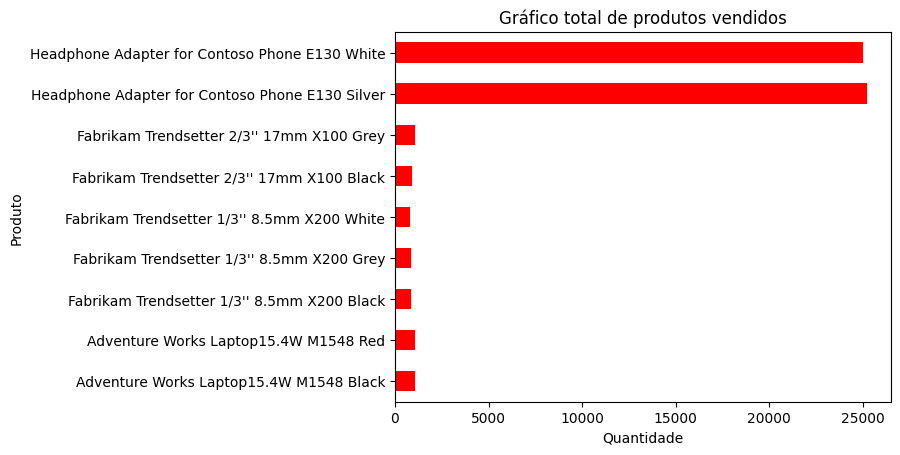

In [25]:
# Gráfico total de produtos vendidos

df.groupby('Produto')['Quantidade'].sum().plot.barh(title='Gráfico total de produtos vendidos', color='red')
plt.xlabel('Quantidade');

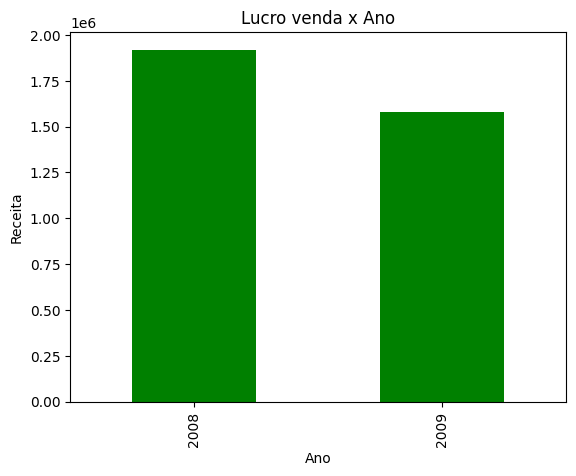

In [26]:
df.groupby(df['Data Venda'].dt.year)['lucro_venda'].sum().plot.bar(title='Lucro venda x Ano', color='green')
plt.xlabel('Ano')
plt.ylabel('Receita');

In [27]:
df.groupby(df['Data Venda'].dt.year)['lucro_venda'].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: lucro_venda, dtype: float64

In [28]:
# Selecionando as vendas de 2009
df_2009 = df[df['Data Venda'].dt.year == 2009]
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,lucro (%),lucro_venda,Tempo de envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48",45.99,"2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48",45.99,"2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48",45.99,"2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48",45.99,"2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48",45.99,"2,456.52",4


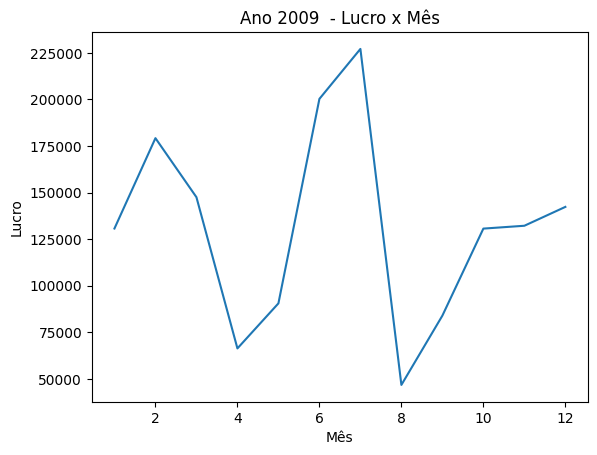

In [29]:
# Gráfico de linha que dá o lucro por mês do ano de 2009

df_2009.groupby(df_2009['Data Venda'].dt.month)['lucro_venda'].sum().plot(title='Ano 2009  - Lucro x Mês')
plt.ylabel('Lucro')
plt.xlabel('Mês');

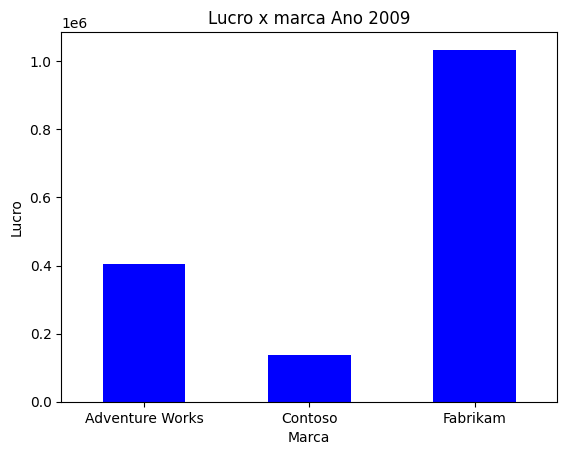

In [30]:
# Gráfico de lucro por marca em 2009
df_2009.groupby('Marca')['lucro_venda'].sum().plot.bar(title='Lucro x marca Ano 2009', color='blue')
plt.xlabel('Marca')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal');

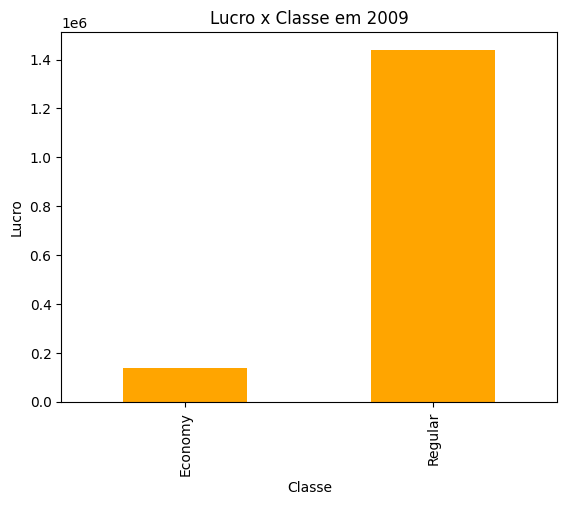

In [31]:
# Gráfico de lucro por classe em 2009
df_2009.groupby('Classe')['lucro_venda'].sum().plot.bar(title='Lucro x Classe em 2009', color ='orange')
plt.xlabel('Classe')
plt.ylabel('Lucro');

In [32]:
# Descrição estatística dos dados
df['Tempo de envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo de envio, dtype: float64

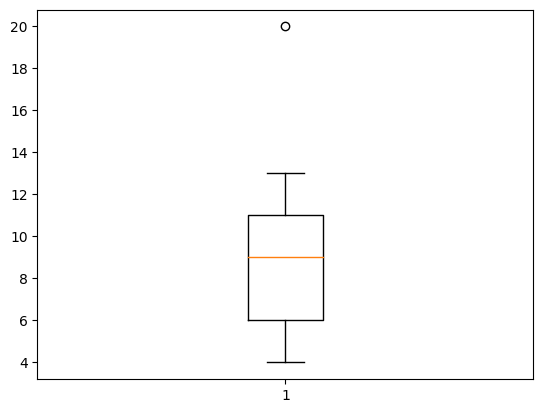

In [33]:
# Gráfico boxplot de tempo de envio - verificar outliers
plt.boxplot(df['Tempo de envio']);

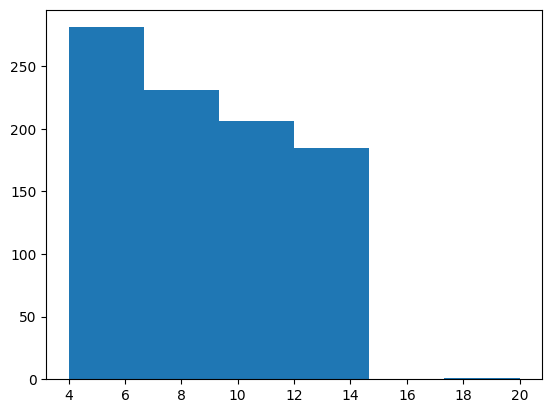

In [34]:
# Histograma
plt.hist(df['Tempo de envio'], bins=6);

In [35]:
# Indentificando o Outliers
df[df['Tempo de envio'] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,lucro (%),lucro_venda,Tempo de envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48",45.99,"2,456.52",20


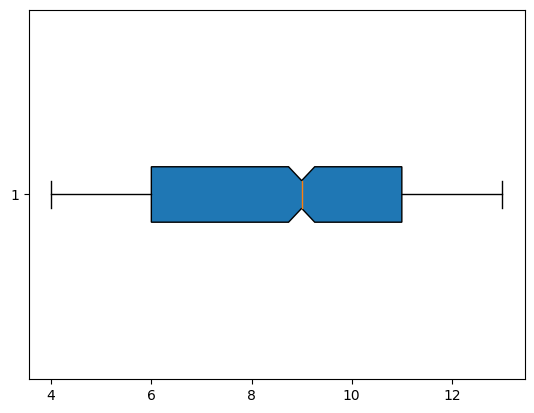

In [36]:
# Modificando o outlier com um valor da mediana
df.loc[df['Tempo de envio'] == 20] = 9
plt.boxplot(df['Tempo de envio'],vert=False, notch = True, patch_artist=True);

In [37]:
df.to_csv("df_vendas_novo.csv", index=False)